In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

Single neuron

In [2]:
inputs = [1.2, 5.1, 2.1]

In [3]:
weights = [3.1, 2.1, 8.7]

In [4]:
bias = 3

In [5]:
output = sum([i * w for i, w in zip(inputs, weights)]) + bias

In [6]:
output

35.7

In [7]:
np.dot(inputs, weights) + bias

35.7

Layer of neurons, inputs same, weights and bias unique to each neuron

In [45]:
weights = [[3.1, 2.1, 8.7], [4.2, 6.7, 9.1]]#, [0.1, 2.3, 5.8], [3.5, 2.7, 9.2]]
biases = [3, 1]#, 9]

In [46]:
layer_outputs = [np.dot(inputs, weights[i]) + biases[i] for i in range(len(biases))]
layer_outputs

[35.7, 59.32]

In [48]:
np.array(weights)

array([[3.1, 2.1, 8.7],
       [4.2, 6.7, 9.1]])

In [49]:
np.array(weights).shape

(2, 3)

In [10]:
class Layer:
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases
        
    def get_output(self, inputs):
        return [np.dot(inputs, self.weights[i]) + self.biases[i] for i in range(len(self.biases))]

In [28]:
l = Layer(np.array(weights), np.array(biases))

In [32]:
l.get_output(np.array(inputs))

[35.7, 59.32, 33.03]

In [87]:
def create_random_layer(n_neurons, n_inputs):
    return Layer(
        weights=(np.random.rand(n_neurons, n_inputs) * 10)  - 5,
        biases=(np.random.rand(n_neurons) * 10) - 5
    )

In [97]:
lr = create_random_layer(n_neurons=2, n_inputs=3)
print(lr.weights)
print(lr.biases)

[[-1.08383258 -0.91270088  1.13258546]
 [ 2.82811154  1.44479022  3.44246238]]
[ 2.1794636  -3.26099868]


In [89]:
lr.get_output(inputs)

[24.1149255690157, 6.382199109248088]

In [230]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from random import choice

In [231]:
mnist_dataset = load_digits()

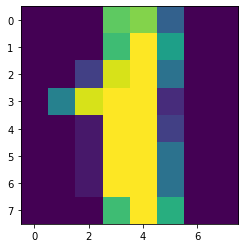

In [232]:
dataset = mnist_dataset["data"]

plt.imshow(dataset[1].reshape(8, 8))

In [233]:
targets = mnist_dataset["target"]

In [234]:
def get_data_choice(target_val: int):
    return dataset[choice(np.where(targets == target_val)[0])]

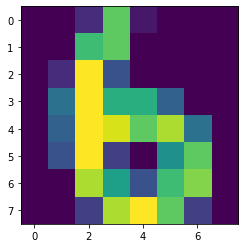

In [235]:
plt.imshow(get_data_choice(6).reshape(8, 8))

In [296]:
from typing import *

In [321]:
n_epochs = 3000
losses = list()
models: List[dict] = list()

for epoch in tqdm(range(n_epochs)):
    input_layer = create_random_layer(n_neurons=128, n_inputs=64)

    dense_layers = [create_random_layer(n_neurons=128, n_inputs=128) for i in range(10)]

    output_layer = create_random_layer(n_neurons=10, n_inputs=128)

    target = 6

    input_data = MinMaxScaler((0, 1)).fit_transform(get_data_choice(target).reshape(-1, 1)).ravel()

    previous_output = input_layer.get_output(input_data)

    for dl in dense_layers:
        previous_output = dl.get_output(previous_output)

    output = np.array(output_layer.get_output(previous_output))

    scaled_output = MinMaxScaler((0, 1)).fit_transform(output.reshape(-1, 1)).ravel()

    target_output = np.zeros(10)
    target_output[target] = 1

    loss = euclidean(target_output, scaled_output)
    losses.append(loss)
    
    models.append(
        {
            "input_layer": input_layer, 
            "dense_layers": dense_layers,
            "output_layer": output_layer,
            "input_data": input_data,
            "scaled_output": scaled_output
        }
    )

100%|████████████████████████████████████████████████████████████████████| 3000/3000 [00:22<00:00, 134.70it/s]


2913
0.808132797881967


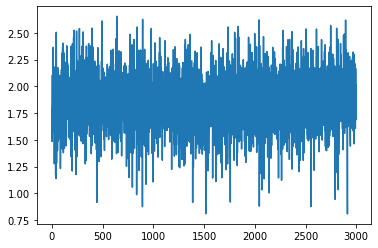

In [322]:
plt.plot(losses)
print(np.argmin(losses))
print(np.min(losses))

In [323]:
models[2913]["scaled_output"]

array([0.39012089, 0.2979694 , 0.30584001, 0.35070296, 0.2550613 ,
       0.27318156, 1.        , 0.        , 0.19342115, 0.13591062])

In [448]:
def test_model(index: int):
    input_layer = models[2913]["input_layer"]

    dense_layers = models[2913]["dense_layers"]

    output_layer = models[2913]["output_layer"]

    target = 6

    input_data = MinMaxScaler((0, 1)).fit_transform(get_data_choice(target).reshape(-1, 1)).ravel()

    previous_output = input_layer.get_output(input_data)

    for dl in dense_layers:
        previous_output = dl.get_output(previous_output)

    output = np.array(output_layer.get_output(previous_output))

    scaled_output = MinMaxScaler((0, 1)).fit_transform(output.reshape(-1, 1)).ravel()
    
    print(f"predicted: {np.argmax(scaled_output)}")
    plt.imshow(input_data.reshape(8, 8))

predicted: 6


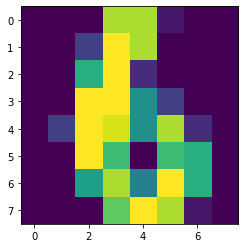

In [449]:
test_model(2913)